In [31]:
using vlasovSL,Plots,Statistics

In [68]:
grid = vlasovSL.simulationData([0.,-4.],[2pi,4.],[0.1,0.1],0.1,1)
f = vlasovSL.Distribution(grid)

vlasovSL.Distribution([6.691511288244268e-5 9.932773569638636e-5 … 9.932773569638636e-5 6.691511288244268e-5; 6.658081603807975e-5 9.883151074553928e-5 … 9.883151074553928e-5 6.658081603807975e-5; … ; 6.57955185521287e-5 9.76658275722236e-5 … 9.76658275722236e-5 6.57955185521287e-5; 6.668372691441475e-5 9.898427002344477e-5 … 9.898427002344477e-5 6.668372691441475e-5])

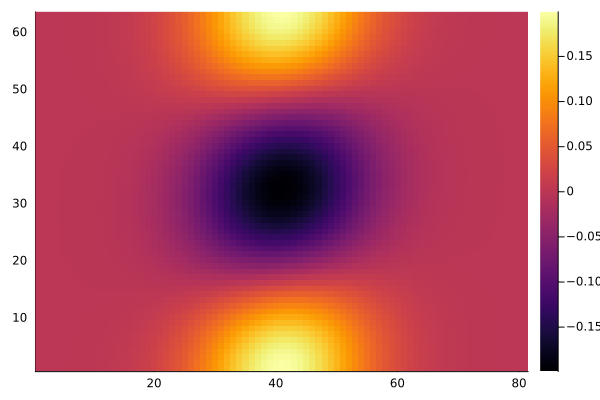

In [69]:
vlasovSL.advectX!(f.data,grid)
heatmap(f.data)

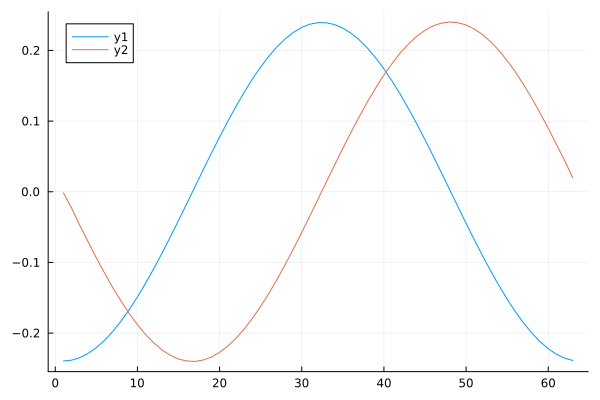

In [70]:
rho = vlasovSL.compute_density(f.data, grid)
plot(rho.data)
e = vlasovSL.compute_e(-1 .* rho.data, grid)
plot!(e.data[1])

In [71]:
el = []
for i = 1:1000
    vlasovSL.advectX!(f.data,grid)
    rho = vlasovSL.compute_density(f.data, grid)
    e = vlasovSL.compute_e(rho.data, grid)
    plot(e.data[1])
    plot!(rho.data)
    vlasovSL.advectV!(f.data,grid,e.data[1])
    push!(el, mean(rho.data.^2))
    heatmap(reduce(vcat, transpose.(df)))
end

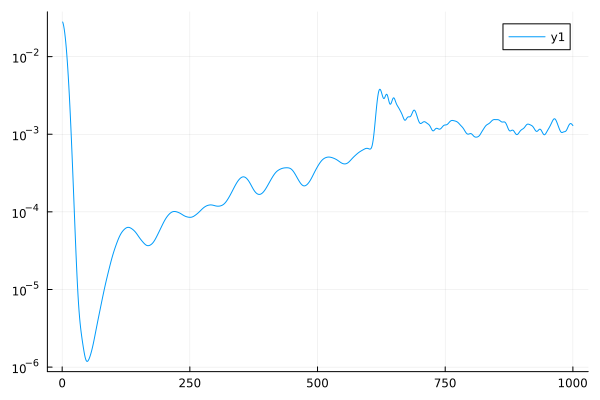

In [72]:
plot(el,yscale=:log10)

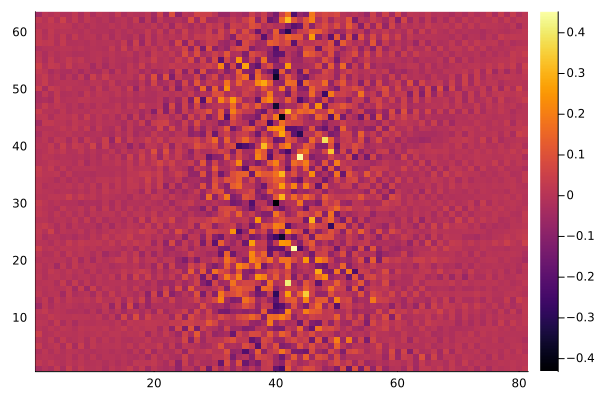

In [73]:
heatmap(f.data)